# Base House prices
Descrição: Modelo preditivo para preços das casas a partir dos dados do imóvel

Algoritmos: Regressão Linear simples, Regressão Linear multipla, Regressão Polinomial, com Árvores de decisão e Random forest

Fonte de dadps: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Regressão Linear simples

In [4]:
base = pd.read_csv('house_prices.csv')

In [5]:
X = base.iloc[:, 5:6].values
y = base.iloc[:, 2].values

In [8]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

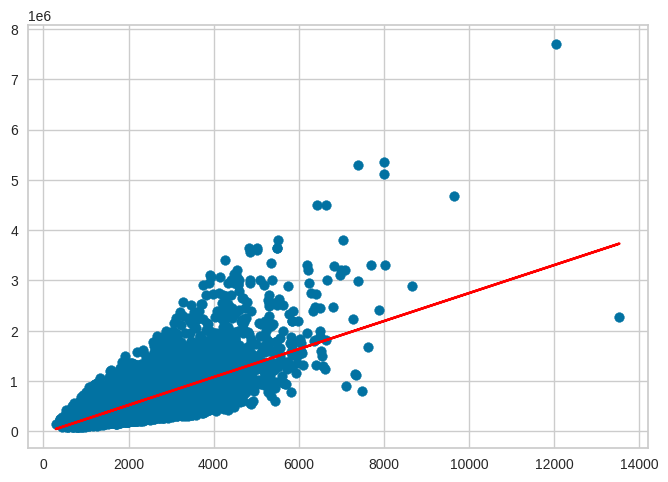

In [10]:
plt.scatter(X_treinamento, y_treinamento)
plt.plot(X_treinamento, regressor.predict(X_treinamento), color = 'red')

In [11]:
previsoes = regressor.predict(X_teste)

In [12]:
resultado = abs(y_teste - previsoes)
resultado.mean()

172604.1288999542

In [13]:
# mean square error e mean absolute error
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)
mae

172604.1288999542

In [14]:
mse

70170013932.1159

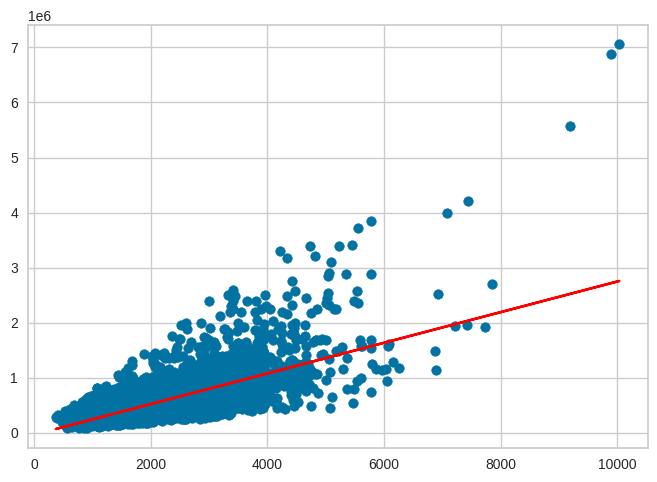

In [15]:
plt.scatter(X_teste, y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')

In [252]:
regressor.score(X_teste, y_teste)

0.48889929019453016

# Regressão Linear multipla

In [17]:
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

In [18]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [20]:
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)
score

0.7029888085955007

In [21]:
previsoes = regressor.predict(X_teste)

In [22]:
mae = mean_absolute_error(y_teste, previsoes)
mae

123888.44377486104

In [23]:
regressor.score(X_teste, y_teste)

0.6885414149062794

In [24]:
regressor.intercept_
len(regressor.coef_)

16

In [25]:
# Função preços casas
def precosCasas():
    base_saude = pd.read_csv('house_prices.csv')
    X = base_casas.iloc[:, 3:19].values
    y = base_casas.iloc[:, 2].values
    
    X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
    return X_treinamento
    return X_teste
    return y_treinamento
    return y_teste

# Regressão Polinomial

In [141]:
precosCasas()

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [101]:
poly = PolynomialFeatures(degree = 2)
X_treinamento_poly = poly.fit_transform(X_treinamento)
X_teste_poly = poly.transform(X_teste)

In [102]:
regressor = LinearRegression()
regressor.fit(X_treinamento_poly, y_treinamento)
score = regressor.score(X_treinamento_poly, y_treinamento)

In [103]:
previsoes = regressor.predict(X_teste_poly)

In [104]:
mae = mean_absolute_error(y_teste, previsoes)

In [105]:
mae

101218.10705382614

In [179]:
regressor.predict(np.array(40).reshape(1, -1))

array([1150.])

# Regressão Árvores de decisão

In [111]:
# chama a função
precosCasas()

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [116]:
regressor = DecisionTreeRegressor()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)
score

0.9992712177726063

In [117]:
previsoes = regressor.predict(X_teste)
previsoes

array([ 288000., 2340000.,  507000., ...,  289000.,  215000.,  219950.])

In [119]:
mae = mean_absolute_error(y_teste, previsoes)
mae

99103.24722393585

In [120]:
regressor.score(X_teste, y_teste)

0.7536705465763243

# Regressão com Random Forest

In [301]:
precosCasas()

regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

In [302]:
previsoes = regressor.predict(X_teste)

In [303]:
mae = mean_absolute_error(y_teste, previsoes)
regressor.score(X_teste, y_teste)

0.5031101023908858

In [304]:
mae

169071.32648205082